In [1]:
using Distributions, Random
Random.seed!(123) # Setting the seed

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273


MersenneTwister(UInt32[0x0000007b], Random.DSFMT.DSFMT_state(Int32[1464307935, 1073116007, 222134151, 1073120226, -290652630, 1072956456, -580276323, 1073476387, 1332671753, 1073438661  …  138346874, 1073030449, 1049893279, 1073166535, -1999907543, 1597138926, -775229811, 32947490, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x0000000000000

In [28]:
# the plan is to simulate intensity distribution by using a Poisson distribution
# over a small area.  The first thing that we have to figure out is over which length
# a normal distribution will be non-zero given double resolution
w = 2 # is the way the Gaussian width is defined in optics
sigma = w/2
ep = 1.0
x = range(-20,stop=20,length=200)
d = Normal(0.0,sigma)
intensity = ep*sigma*sqrt(2*π)*pdf.(d,x)
println(x[2]," ",x[end-1])

-19.798994974874372 19.798994974874372


In [21]:
import Pkg; Pkg.add("PyPlot")
using PyPlot

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %>                                 ]  15.8 % %>                     ]  47.4 %==========================>              ]  63.2 %63.6 %>        ]  79.5 %=======================================> ]  95.3 % Resolving package versions...
 Installed Calculus ────────── v0.5.1
 Installed NaNMath ─────────── v0.3.3
 Installed Parsers ─────────── v0.3.10
 Installed DiffEqJump ──────── v6.3.0
 Installed IterTools ───────── v1.3.0
 Installed DataStructures ──── v0.17.6
 Installed DiffEqBase ──────── v6.6.0
 Installed CategoricalArrays ─ v0.7.3
 Installed GR ──────────────── v0.44.0
  Updating `~/.julia/environments/v1.3/Project.toml`
  [d330b81b] + PyPlot v2.8.2
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [49dc2e85] ↑ Calculus v0.5.0 ⇒ v0.5.1
  [324d7699] ↑ CategoricalArrays v0.7.2 ⇒ v0.7.3
  [864edb3b

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


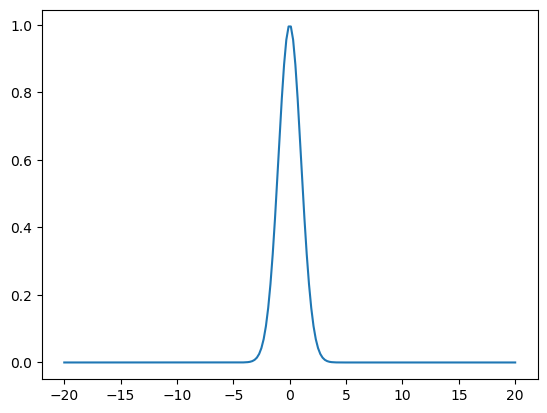

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13ba085f8>

In [29]:
plot(x,intensity)

In [30]:
# set limits and define the length of the box
xlim1 = x[2]
xlim2 = x[end-1]
L = xlim2-xlim1
print(L)

39.597989949748744

In [31]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 1
N_avg_L = N_avg*L/sqrt(π)*sqrt(2)/w
print(N_avg_L)

#empty list of intensities
int_list = zeros(0)

N_samples = 1000000
p = Poisson(N_avg_L)
N_draws = rand(p,N_samples)
for i = 1:N_samples
    positions = rand(N_draws[i]).*L .+ xlim1
    intensities = ep .* sigma .* sqrt(2*π)*pdf.(d,positions)
    append!( int_list, sum(intensities) )
end


15.797312409865778

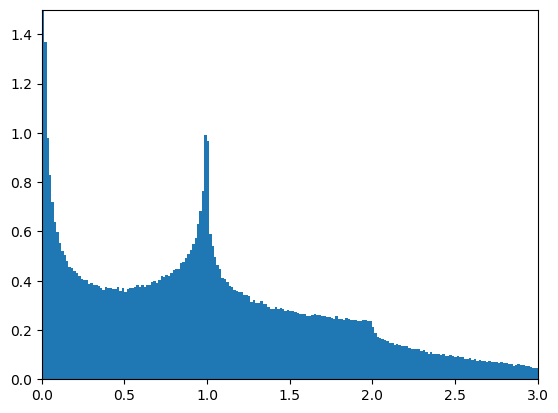

(0, 1.5)

In [32]:
hist(int_list,bins=500,density=true)
xlim((0,3))
ylim((0,1.5))

In [33]:
println(mean(int_list))

1.0006728807127638


In [34]:
# now lets create from this list a sequence of photon arrival times
photons_particle = 10.0
times_total = zeros(0)
for (index,i) in enumerate(int_list)
    p = Poisson(i*photons_particle)
    particles = rand(p)
    times = sort(rand(particles))
    append!(times_total,times .+ index)
end

delta_t = diff(times_total)

10005481-element Array{Float64,1}:
 0.2744653165387958   
 0.011777100694639442 
 0.042943648375009635 
 0.047360656121425704 
 0.097182500060639    
 0.24570396150974383  
 0.002060560141789347 
 0.06411441831590992  
 0.009777734554984097 
 0.2022915527214535   
 0.04377468202024559  
 0.035034985903135585 
 0.0004512772987546043
 ⋮                    
 0.012190726236440241 
 0.03737277875188738  
 0.0794069622643292   
 0.012731009628623724 
 0.026926149963401258 
 0.06910549243912101  
 0.07153145468328148  
 0.007694349740631878 
 0.015119810472242534 
 0.035921306000091136 
 0.0026714703999459743
 0.0719759613275528   

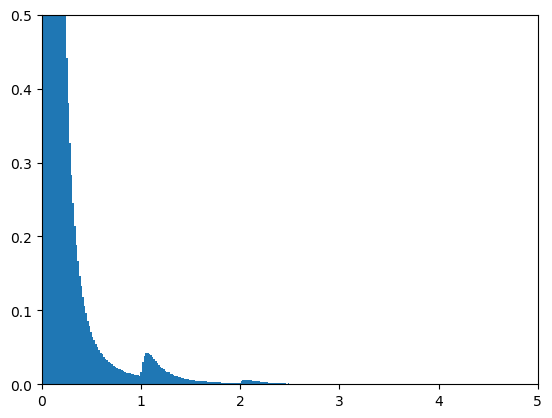

(0, 0.5)

In [35]:
hist(delta_t,bins=500,density=true)
xlim((0,5))
ylim((0,0.5))

In [36]:
# now lets create from this list a sequence of photon arrival times
photons_particle = 10.0
times_total2 = zeros(0)
for (index,i) in enumerate(sort(int_list))
    p = Poisson(i*photons_particle)
    particles = rand(p)
    times = sort(rand(particles))
    append!(times_total2,times .+ index)
end

delta_t2 = diff(times_total2)

10007391-element Array{Float64,1}:
 3040.4179959046887      
 1534.2206559409533      
   52.895658982237364    
 2478.05857007172        
 1241.7646052559357      
  236.4070640866994      
  802.7408152313437      
  186.97474616253749     
  358.5975593100302      
  204.51800232451205     
  427.0065257725437      
  584.7068606653338      
  207.99662991071818     
    ⋮                    
    0.007926029851660132 
    0.007533722440712154 
    0.017095992574468255 
    0.0036055012606084347
    0.009876494528725743 
    0.0017063578125089407
    0.026912867440842092 
    0.0009158503962680697
    0.0026540148537606   
    0.0013799339067190886
    0.017281054402701557 
    0.014896531822159886 

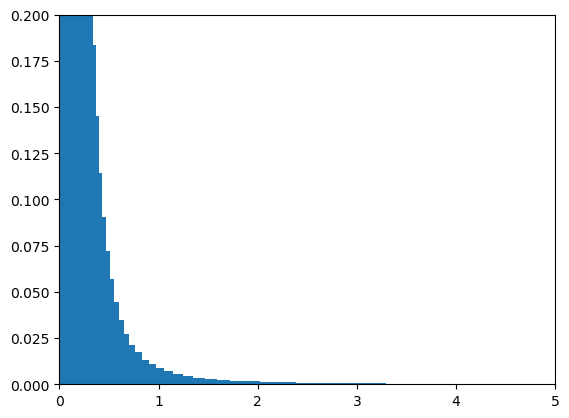

(0, 0.2)

In [37]:
hist(delta_t2,bins=10 .^(range(-3,stop=4,length=200)),density=true)
xlim((0,5))
ylim((0,0.2))
#yscale("log")

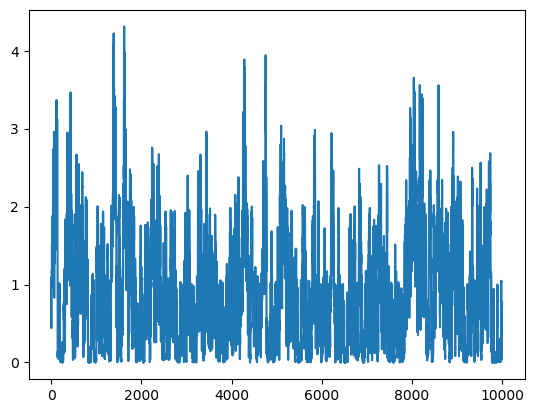

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13a96fcf8>

In [38]:
# it is clear that the photon arrival times are dependent on the order we sample the intensities
# we therefore need to simulate realistic FCS time traces
dt = 0.1
D = 1.0
L = 10
#xl = 5.0
#xr = 6.0
N = 8
length = 1000000

focus = Normal(0.0,sigma)
diffusion = Normal(0.0,sqrt(2*D*dt))

# generate steps for all particles
# initial positions


fcs_intensity = zeros(0)
x = 2*L*rand(N)
append!(fcs_intensity,sum(sqrt(2*π)*pdf.(focus,x.-L)))

for i = 1:length
    x = x .+ rand(diffusion,size(x))
    x = mod.(x,2L)
    append!(fcs_intensity,sum(sqrt(2*π)*pdf.(focus,x.-L)))
end
plot(fcs_intensity[1:10000])

In [39]:
print(mean(fcs_intensity))

1.0036450313003928

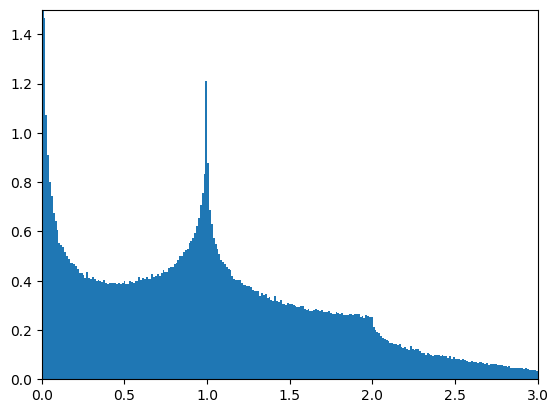

(0, 1.5)

In [40]:
hist(fcs_intensity,bins=500,density=true)
xlim((0,3))
ylim((0,1.5))

In [41]:
# now lets create from this list a sequence of photon arrival times
photons_particle = 100.0
times_total3 = zeros(0)
for (index,i) in enumerate(fcs_intensity)
    p = Poisson(i*photons_particle)
    particles = rand(p)
    times = sort(rand(particles))
    append!(times_total3,times .+ index)
end

delta_t3 = diff(times_total3)

100361617-element Array{Float64,1}:
 0.001236300852174077  
 0.0022612938672179617 
 0.0025040678542895822 
 0.009137727526435935  
 0.04945873324768457   
 0.001156790689344156  
 0.012989283516196215  
 0.008850798971748786  
 0.00011321485058868319
 0.0055755926546186    
 0.04555732183772765   
 0.0008778008774825707 
 0.004135336166672499  
 ⋮                     
 0.016538544674403965  
 0.014149694121442735  
 0.12528236932121217   
 0.03233623260166496   
 0.026807396323420107  
 0.006501859985291958  
 0.0853630043566227    
 0.019551747711375356  
 0.0017327364766970277 
 0.01542767568025738   
 0.011221485678106546  
 0.003059595706872642  

In [42]:
print(mean(delta_t3))

0.009963978348947243

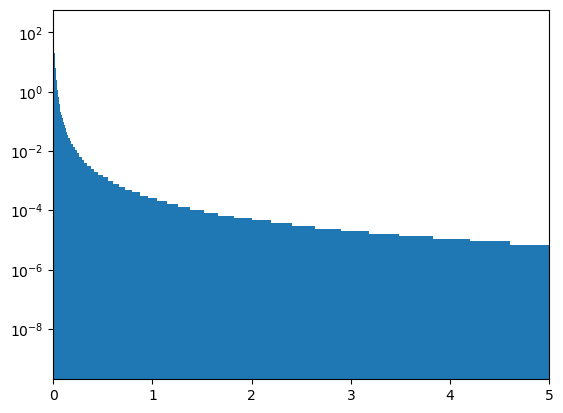

In [43]:
hist(delta_t3,bins=10 .^(range(-4,stop=4,length=200)),density=true)
xlim((0,5))
#ylim((0,1))
yscale("log")

In [44]:
# there is nothing to see in the distribution of delta_t's
# we may have to look at calculated intensities
counts = zeros(0)
count=0
binsize=1.0
step = binsize
for t in times_total3
    if t<=step
        count = count +1
    else
        step = step + binsize
        append!(counts,count)
        count = 0
    end
end

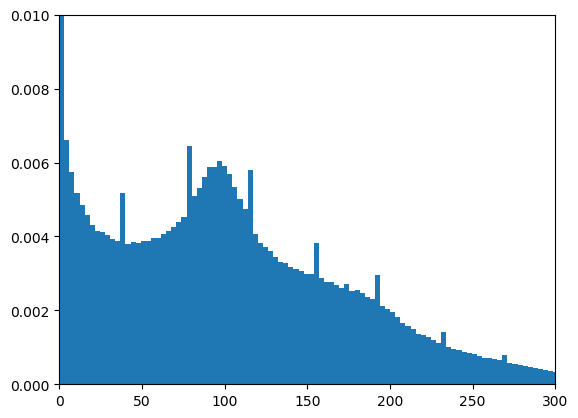

(0, 0.01)

In [45]:
hist(counts,bins=200,density=true)
xlim((0,300))
ylim((0,0.01))
#yscale("log")